## Regresión logística multiclase

[Curso de Regresión Logística con Python y scikit-learn](platzi.com/reglog)

## Importar librerías

In [ ]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga de datos

In [ ]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

In [ ]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


al ejecutar df['Class'].unique(), obtendrás un array con todos los valores únicos presentes en la columna 'Class' del DataFrame df. Esto puede ser útil para conocer los distintos valores o categorías que existen en esa columna específica.


In [ ]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)

ejemplo de como drop_duplicate elimina valores repetidos

In [ ]:
import pandas as pd

pd = pd.DataFrame({'A': [1, 2, 3, 1, 2],
                   'B': ['a', 'b', 'c', 'a', 'b']})

print("DataFrame original:")
print(pd)

pd.drop_duplicates(inplace=True)

print("DataFrame después de eliminar duplicados:")
print(pd)

DataFrame original:
   A  B
0  1  a
1  2  b
2  3  c
3  1  a
4  2  b
DataFrame después de eliminar duplicados:
   A  B
0  1  a
1  2  b
2  3  c


## Manejo de datos nulos

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

no hay datos NaN

## undersampling (tecnica de balanceo de clases)

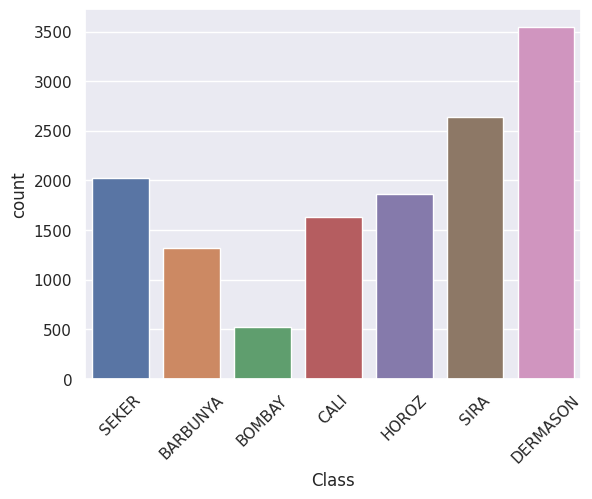

In [ ]:
sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

Aplicar submuestreo (undersampling) a la clase mayoritaria
El submuestreo aleatorio reduce la cantidad de ejemplos de la clase mayoritaria a un número igual al número
de ejemplos de la clase minoritaria, seleccionando aleatoriamente ejemplos de la clase mayoritaria sin reemplazo.

Esto puede ayudar a equilibrar las clases y mejorar el rendimiento de los modelos de aprendizaje automático cuando
se trata de problemas de desequilibrio de clases.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [ ]:
#Dividimios en caracteristicas y etiquetas
X = df.drop('Class',axis=1)
y = df.Class

In [ ]:
X_over , y_over = undersample.fit_resample(X,y)

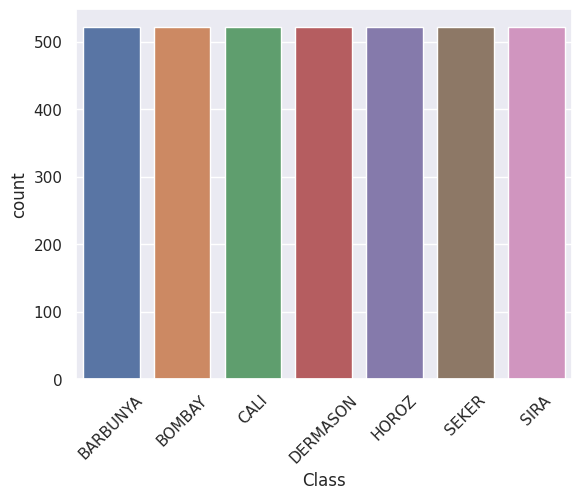

In [ ]:
sns.countplot(x=y_over, data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.shape

(13543, 17)

In [ ]:
X_over.shape

(3654, 16)

## Conversión a numéricos

In [ ]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [ ]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [ ]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio de datos

### Corrrelations

OJO QUE df_dea se genera para poder realizar el heatmap pero al hacer una igualdad (df_dea = X_over)   la columna class queda adherida a X_over como se muestra en la siguiente linea.

In [ ]:
#df_dea = X_over
#df_dea['Class'] = y_over

#X_over.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658,1
1,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731,1
2,60736,985.501,342.445302,226.741776,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941,1
3,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165595,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864,1
4,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678,1


Lo solucionamos haciendo una copia profunda del DataFrame original.

Realizar una copia profunda de un DataFrame implica crear una nueva instancia de DataFrame que sea independiente del original, es decir, no comparta ninguna referencia de datos con el DataFrame original. Esto significa que cualquier modificación realizada en la copia no afectará al DataFrame original y viceversa.

In [ ]:
df_dea = X_over.copy(deep = True) #copia profunda para que la columna class no quede adherida a X_over
df_dea['Class'] = y_over

In [ ]:
X_over.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658
1,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731
2,60736,985.501,342.445302,226.741776,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941
3,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165595,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864
4,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678


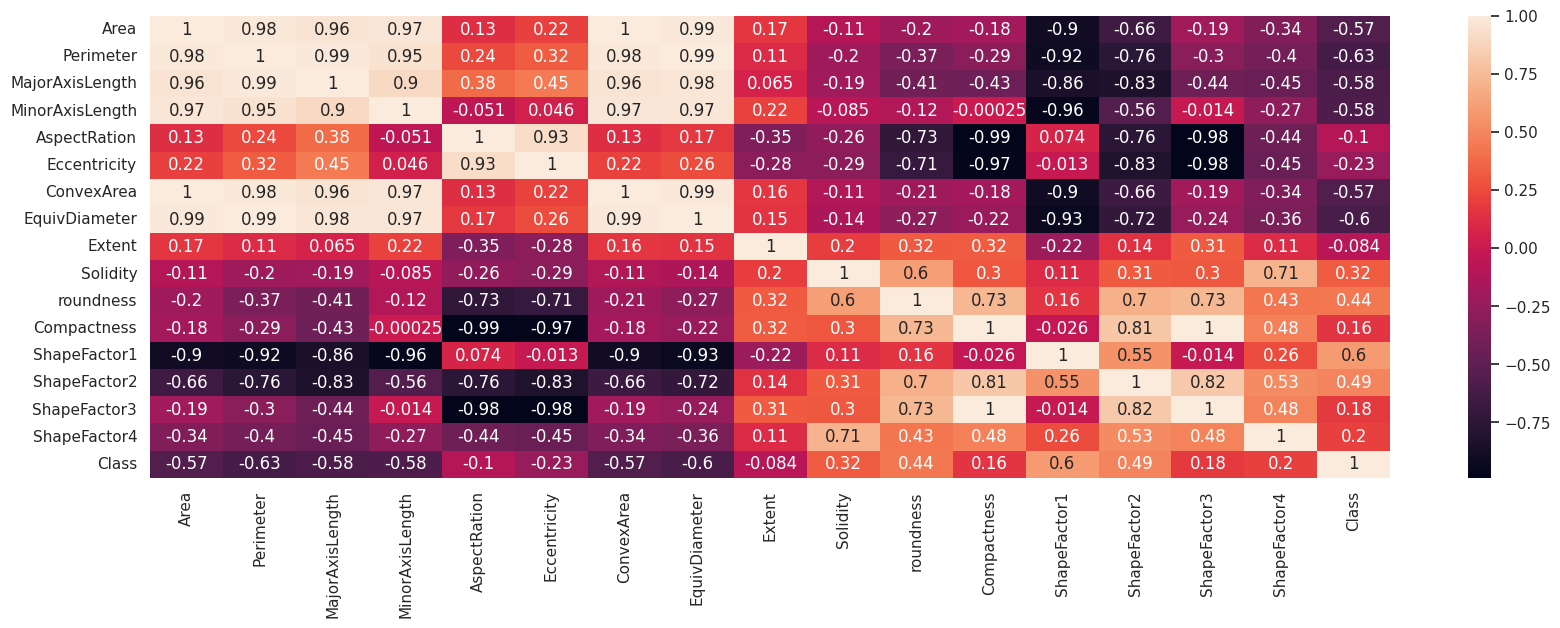

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

del mapa de calor vemos que ConvexArea y area estan fuertemente correlacionadas.
Mas detalladamente Convex Area y EquivDiameter estan fuertemente correlacionadas con Area, perimeter, majorAxisLenght, MinorAxisLenght

Al estar altamente correlacionadas estarian diciendo lo mismo y por lo tanto el proceso de ML puede caer en un sobre entrenamiento de ciertas caracteristicas

Por ello es conveniente NO TENER VARIABLES FUERTEMENTE CORRELACIONADAS

In [ ]:
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True)

podria ver como queda ahora el mapa de calor


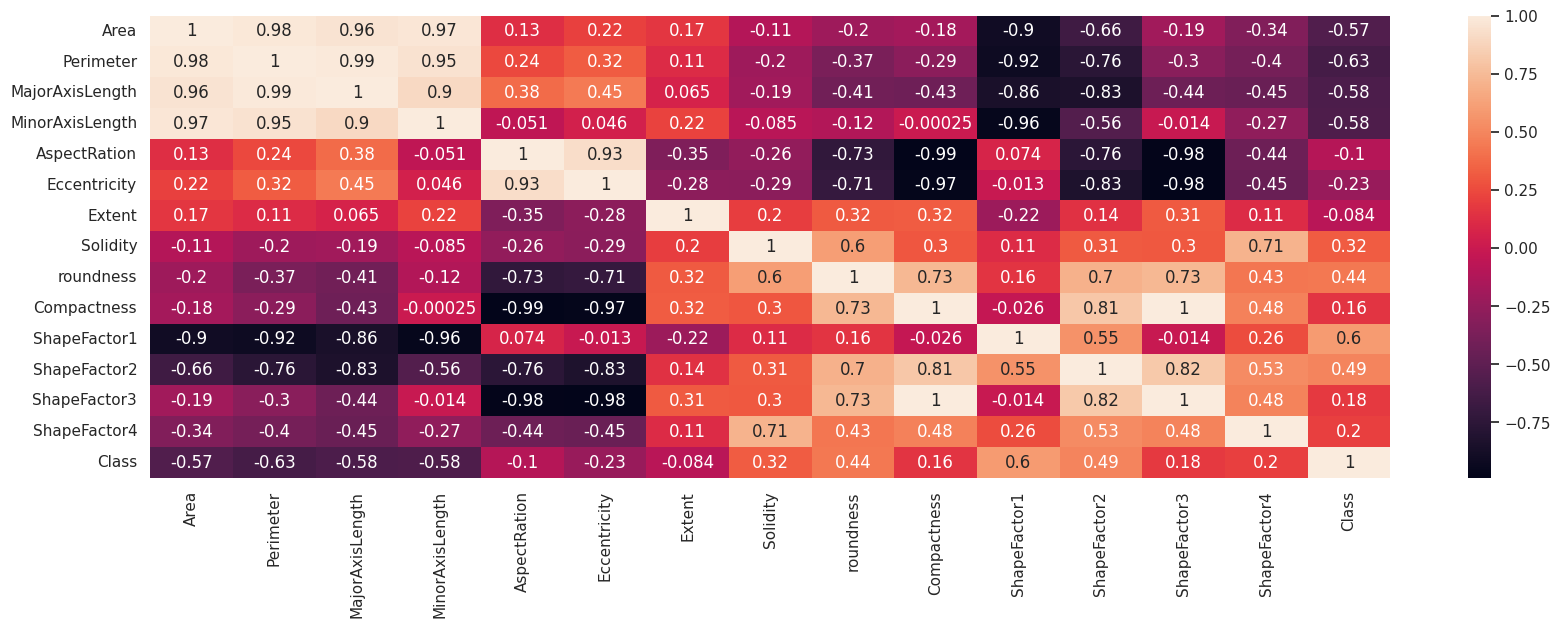

In [ ]:
df_dea1 = X_over.copy(deep = True) #copia profunda para que la columna class no quede adherida a X_over
df_dea1['Class'] = y_over

plt.figure(figsize=(20,6))
sns.heatmap(df_dea1.corr(), annot=True)
plt.show()



## Visualización de datos

In [ ]:
sns.pairplot(df_dea, hue='Class')

Output hidden; open in https://colab.research.google.com to view.

## Split y escalamiento de datos

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [ ]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

# **NOTA:**  
Escalar las etiquetas podría introducir distorsiones en las categorías o clases y afectar negativamente el rendimiento del modelo. Por ejemplo, en un problema de clasificación binaria donde las etiquetas son 0 y 1, si se escalaran las etiquetas, podrían dejar de representar de manera adecuada las clases originales y podrían no ser interpretables correctamente.

Las etiquetas generalmente tienen un significado categórico y no están sujetas a las mismas consideraciones de escala que las características (variables independientes)

## Modelo multiclase

In [ ]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [ ]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


In [ ]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:                                                         #Genera una exepcion ya que hay combinaciones que daran error. Ver cuadro "Scikil-Learn Solver" en apunte
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:                                                       #en la exepcion no realiza ninguna instruccion solo continua
            None

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The

## Evaluación de resultados

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

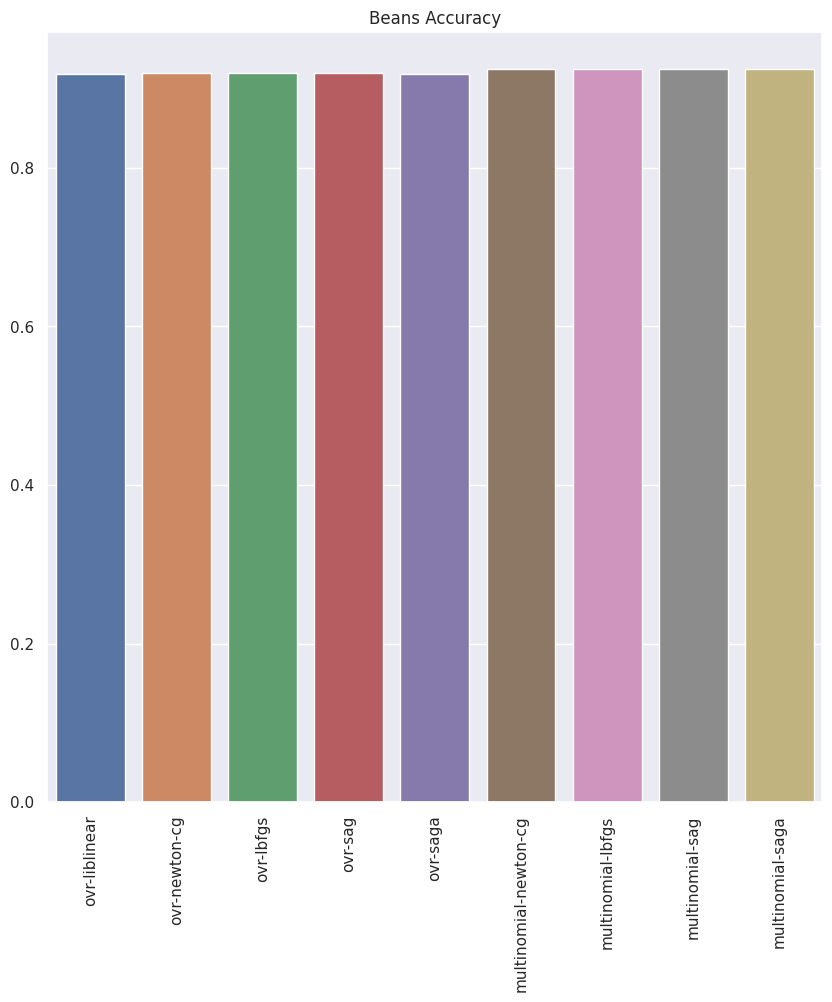

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

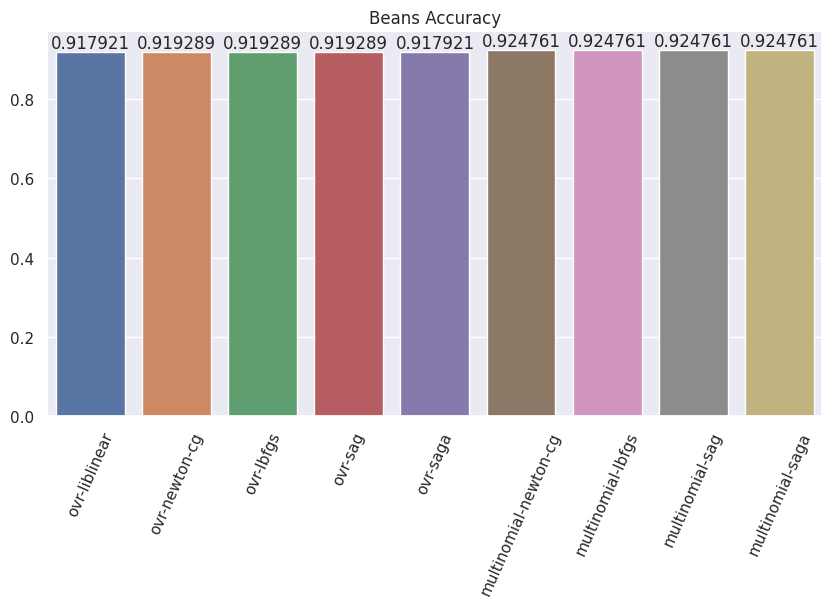

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax = sns.barplot(
        ax=ax1,
        x  = params,
        y = scores
        )
ax.set_title('Beans Accuracy')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=66)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


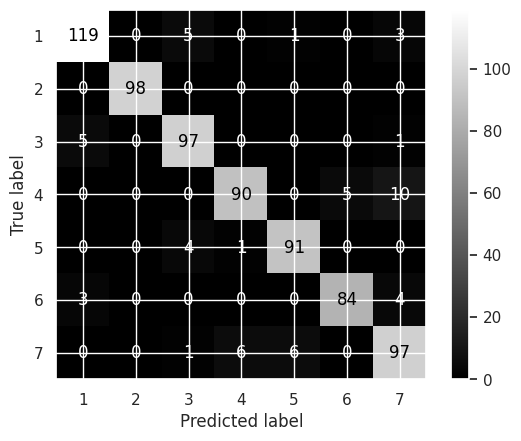

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()